# Decision Tree using Python

First, we will change the location in which the python notebook is open.

In [1]:
import os

In [2]:
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python\\03. Decision Tree and Random Forest'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python'

## Problem Statement

> The Rain in Australia dataset contains about 10 years of daily weather observations from numerous Australian weather stations. As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.

In [5]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
%matplotlib inline

In [6]:
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)
sns.set_style("darkgrid")

#### Downloading the dataset

In [7]:
od.download("https://www.kaggle.com/jsphyg/weather-dataset-rattle-package", data_dir = "Dataset/")

Skipping, found downloaded files in "Dataset/weather-dataset-rattle-package" (use force=True to force download)


In [8]:
os.listdir("Dataset/weather-dataset-rattle-package")

['weatherAUS.csv']

In [9]:
raw_df = pd.read_csv("Dataset/weather-dataset-rattle-package/weatherAUS.csv")

In [10]:
raw_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
raw_df.dropna(subset = ["RainToday", "RainTomorrow"], inplace = True)

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [14]:
new = raw_df.groupby(["Location"]).agg({
    "MinTemp": "min",
    "MaxTemp": "max",
    "Rainfall": "mean"
}).reset_index()

In [15]:
new.columns = ["Location", "MinTemp (min)", "MaxTemp (max)", "Rainfall (avg)"]

In [16]:
new.head()

Location  MinTemp (min)  MaxTemp (max)  Rainfall (avg)
0       Adelaide            0.7           45.7        1.572185
1         Albany            1.8           39.0        2.255073
2         Albury           -2.8           44.8        1.925710
3   AliceSprings           -5.2           44.9        0.869355
4  BadgerysCreek           -1.9           46.4        2.207925

In [17]:
px.histogram(
    raw_df,
    x = "RainTomorrow",
    color = "RainToday",
    title = "Distrubution of Rain Tomorrow"
)

In [18]:
px.scatter(
    raw_df,
    x = "MinTemp",
    y = "MaxTemp",
    color = "RainTomorrow",
    title = "Temperature Range vs Rain Tomorrow"
)

In [19]:
raw_copy = raw_df.copy()
rain_map = {
    "No": 0,
    "Yes": 1
}

raw_copy["RainToday"] = raw_copy["RainToday"].map(rain_map)
raw_copy["RainTomorrow"] = raw_copy["RainTomorrow"].map(rain_map)

In [20]:
numerical_cols = raw_copy.select_dtypes(include = "number").columns

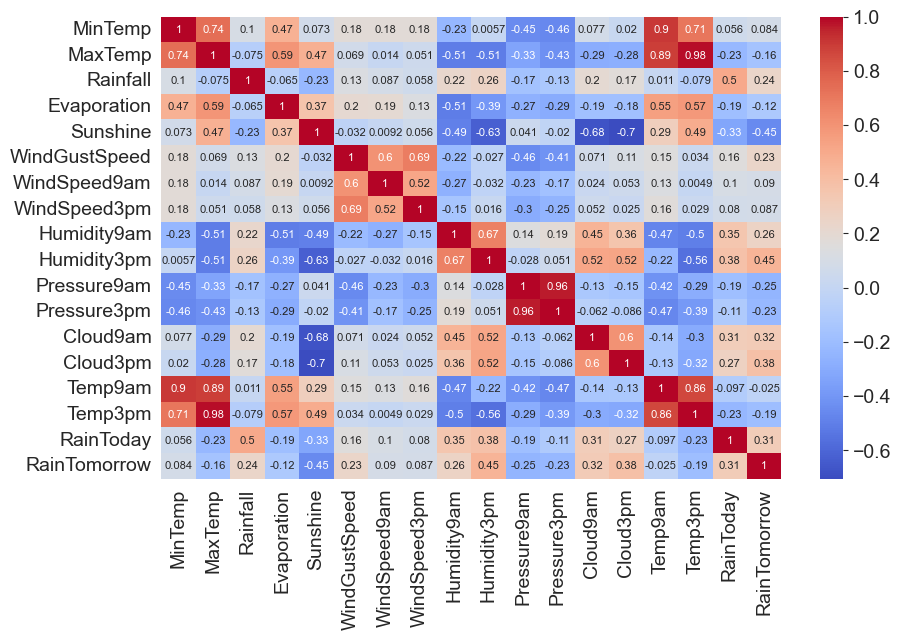

In [21]:
corr = raw_copy[numerical_cols].corr()

sns.heatmap(corr, annot = True, annot_kws = {"size": 8}, cmap = "coolwarm")
plt.show()

#### Preparing the Data for the training

##### Training, Validation and Test dataset

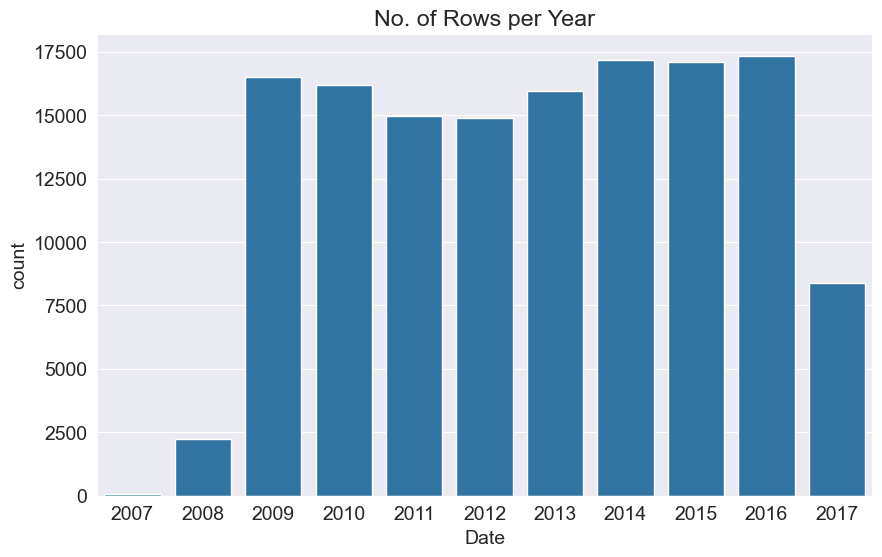

In [22]:
plt.title("No. of Rows per Year")
sns.countplot(
    x = pd.to_datetime(raw_df.Date).dt.year
)
plt.show()

In [23]:
year = pd.to_datetime(raw_df.Date).dt.year

train_data = raw_df[year < 2015]
val_data = raw_df[year == 2015]
test_data = raw_df[year > 2015]

In [24]:
print(f"Training Data shape: {train_data.shape}")
print(f"Validation Data shape: {val_data.shape}")
print(f"Test Data shape: {test_data.shape}")

Training Data shape: (97988, 23)
Validation Data shape: (17089, 23)
Test Data shape: (25710, 23)


##### Input and Target Columns

In [25]:
input_cols = list(raw_df.columns)[1:-1]
target_col = "RainTomorrow"

In [26]:
train_inputs = train_data[input_cols].copy()
train_targets = train_data[target_col].copy()

In [27]:
val_inputs = val_data[input_cols].copy()
val_targets = val_data[target_col].copy()

In [28]:
test_inputs = test_data[input_cols].copy()
test_targets = test_data[target_col].copy()

In [29]:
numerical_cols = raw_df.select_dtypes(include = np.number).columns.tolist()

categorical_cols = list(set(input_cols) - set(numerical_cols))

#### Imputing numeric columns

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
imputer = SimpleImputer(strategy = "mean").fit(raw_df[numerical_cols])

In [32]:
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

In [33]:
test_inputs[numerical_cols].isna().sum()

MinTemp        0
MaxTemp        0
Rainfall       0
Evaporation    0
Sunshine       0
              ..
Pressure3pm    0
Cloud9am       0
Cloud3pm       0
Temp9am        0
Temp3pm        0
Length: 16, dtype: int64

#### Scaling Numeric features

In [34]:
val_inputs.describe().loc[["min", "max"]]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min     -8.2     -3.2       0.0          0.0       0.0            7.0   
max     31.9     45.4     247.2         70.4      14.5          135.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min           0.0           0.0          4.0          0.0        988.1   
max          87.0          74.0        100.0        100.0       1039.3   

     Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
min        982.2       0.0       0.0     -6.2     -4.0  
max       1037.3       8.0       8.0     37.5     42.8

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler().fit(raw_df[numerical_cols])

In [37]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [38]:
val_inputs.describe().loc[["min", "max"]]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min  0.007075  0.030246  0.000000     0.000000       0.0       0.007752   
max  0.952830  0.948960  0.666307     0.485517       1.0       1.000000   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min      0.000000      0.000000         0.04          0.0     0.125620   
max      0.669231      0.850575         1.00          1.0     0.971901   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
min       0.0816  0.000000  0.000000  0.021097  0.026871  
max       0.9632  0.888889  0.888889  0.943038  0.925144

#### Encoding Categorical features

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna("Unknown")
val_inputs[categorical_cols] = val_inputs[categorical_cols].fillna("Unknown")
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna("Unknown")

In [41]:
encoder = OneHotEncoder(sparse_output = False,
                        handle_unknown = "ignore").fit(train_inputs[categorical_cols])

In [42]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [43]:
# Encode the categorical columns
encoded_train_cols = pd.DataFrame(encoder.transform(train_inputs[categorical_cols]), columns = encoded_cols, index = train_inputs.index)
encoded_val_cols = pd.DataFrame(encoder.transform(val_inputs[categorical_cols]), columns = encoded_cols, index = val_inputs.index)
encoded_test_cols = pd.DataFrame(encoder.transform(test_inputs[categorical_cols]), columns = encoded_cols, index = test_inputs.index)

# Concatenate the new encoded columns with the existing dataframes
train_inputs = pd.concat([train_inputs, encoded_train_cols], axis = 1)
val_inputs = pd.concat([val_inputs, encoded_val_cols], axis = 1)
test_inputs = pd.concat([test_inputs, encoded_test_cols], axis = 1)

In [44]:
X_train = train_inputs[numerical_cols + encoded_cols]
X_val = val_inputs[numerical_cols + encoded_cols]
X_test = test_inputs[numerical_cols + encoded_cols]

In [45]:
X_test.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498  0.681604  0.801512  0.000000     0.037741  0.526244       0.372093   
2499  0.693396  0.725898  0.001078     0.037741  0.526244       0.341085   
2500  0.634434  0.527410  0.005930     0.037741  0.526244       0.325581   
2501  0.608491  0.538752  0.042049     0.037741  0.526244       0.255814   
2502  0.566038  0.523629  0.018329     0.037741  0.526244       0.193798   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498      0.000000      0.080460         0.46         0.17     0.543802   
2499      0.069231      0.195402         0.54         0.30     0.505785   
2500      0.084615      0.448276         0.62         0.67     0.553719   
2501      0.069231      0.195402         0.74         0.65     0.618182   
2502      0.046154      0.103448         0.92         0.63     0.591736   

      Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday_No  \
2498       0.5136  0.777778  0.333333  0.702532  0.808061           1.0   
2499       0.5008  0.888889  0.888889  0.675105  0.712092           1.0   
2500       0.6032  0.888889  0.888889  0.611814  0.477927           0.0   
2501       0.6304  0.888889  0.888889  0.556962  0.518234           0.0   
2502       0.5888  0.888889  0.888889  0.514768  0.529750           0.0   

      RainToday_Yes  WindDir9am_E  WindDir9am_ENE  WindDir9am_ESE  \
2498            0.0           0.0             0.0             0.0   
2499            0.0           0.0             0.0             0.0   
2500            1.0           0.0             0.0             1.0   
2501            1.0           0.0             0.0             0.0   
2502            1.0           0.0             0.0             0.0   

      WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  WindDir9am_NNW  \
2498           0.0            0.0             0.0             0.0   
2499           0.0            0.0             0.0             0.0   
2500           0.0            0.0             0.0             0.0   
2501           0.0            0.0             0.0             0.0   
2502           0.0            0.0             0.0             0.0   

      WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
2498            0.0           0.0            0.0             0.0   
2499            0.0           0.0            0.0             1.0   
2500            0.0           0.0            0.0             0.0   
2501            0.0           0.0            1.0             0.0   
2502            0.0           0.0            1.0             0.0   

      WindDir9am_SSW  WindDir9am_SW  WindDir9am_Unknown  WindDir9am_W  \
2498             0.0            0.0                 1.0           0.0   
2499             0.0            0.0                 0.0           0.0   
2500             0.0            0.0                 0.0           0.0   
2501             0.0            0.0                 0.0           0.0   
2502             0.0            0.0                 0.0           0.0   

      WindDir9am_WNW  WindDir9am_WSW  WindGustDir_E  WindGustDir_ENE  \
2498             0.0             0.0            0.0              1.0   
2499             0.0             0.0            0.0              0.0   
2500             0.0             0.0            0.0              1.0   
2501             0.0             0.0            0.0              0.0   
2502             0.0             0.0            0.0              1.0   

      WindGustDir_ESE  WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  \
2498              0.0            0.0             0.0              0.0   
2499              0.0            0.0             0.0              0.0   
2500              0.0            0.0             0.0              0.0   
2501              0.0            0.0             0.0              0.0   
2502              0.0            0.0             0.0              0.0   

      WindGustDir_NNW  WindGustDir_NW  WindGustDir_S  WindGustDir_SE  \
2498              0.0     

#### Training and Visualising the Decision Trees

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model = DecisionTreeClassifier(random_state = 42)

In [50]:
%%time

model.fit(X_train, train_targets)

CPU times: total: 1.94 s
Wall time: 2.16 s


DecisionTreeClassifier(random_state=42)

#### Evaluation

In [52]:
train_preds = model.predict(X_train)

In [53]:
pd.value_counts(train_preds)

C:\Users\rahul\AppData\Local\Temp\ipykernel_16188\1258350197.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



No     76192
Yes    21796
Name: count, dtype: int64

In [55]:
pd.value_counts(train_targets)

C:\Users\rahul\AppData\Local\Temp\ipykernel_16188\2026127828.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



RainTomorrow
No     76190
Yes    21798
Name: count, dtype: int64

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
accuracy_score(train_preds, train_targets)

0.9999795893374699

The decision tree also returns probabilities for each prediction

In [57]:
train_probs = model.predict_proba(X_train)

In [59]:
train_probs[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [60]:
model.score(X_val, val_targets)

0.7937269588624262

We getting the accuracy of 99.99% on the training set and 79.37% on the validationn set, which means that our model is overfitted.

In [61]:
val_targets.value_counts() / len(val_targets)

RainTomorrow
No     0.790626
Yes    0.209374
Name: count, dtype: float64

We see that the majority class in the validation set is 0 (No rain), which means our model is predicting all the instances as No rain.

#### Visualization

In [62]:
from sklearn.tree import plot_tree, export_text

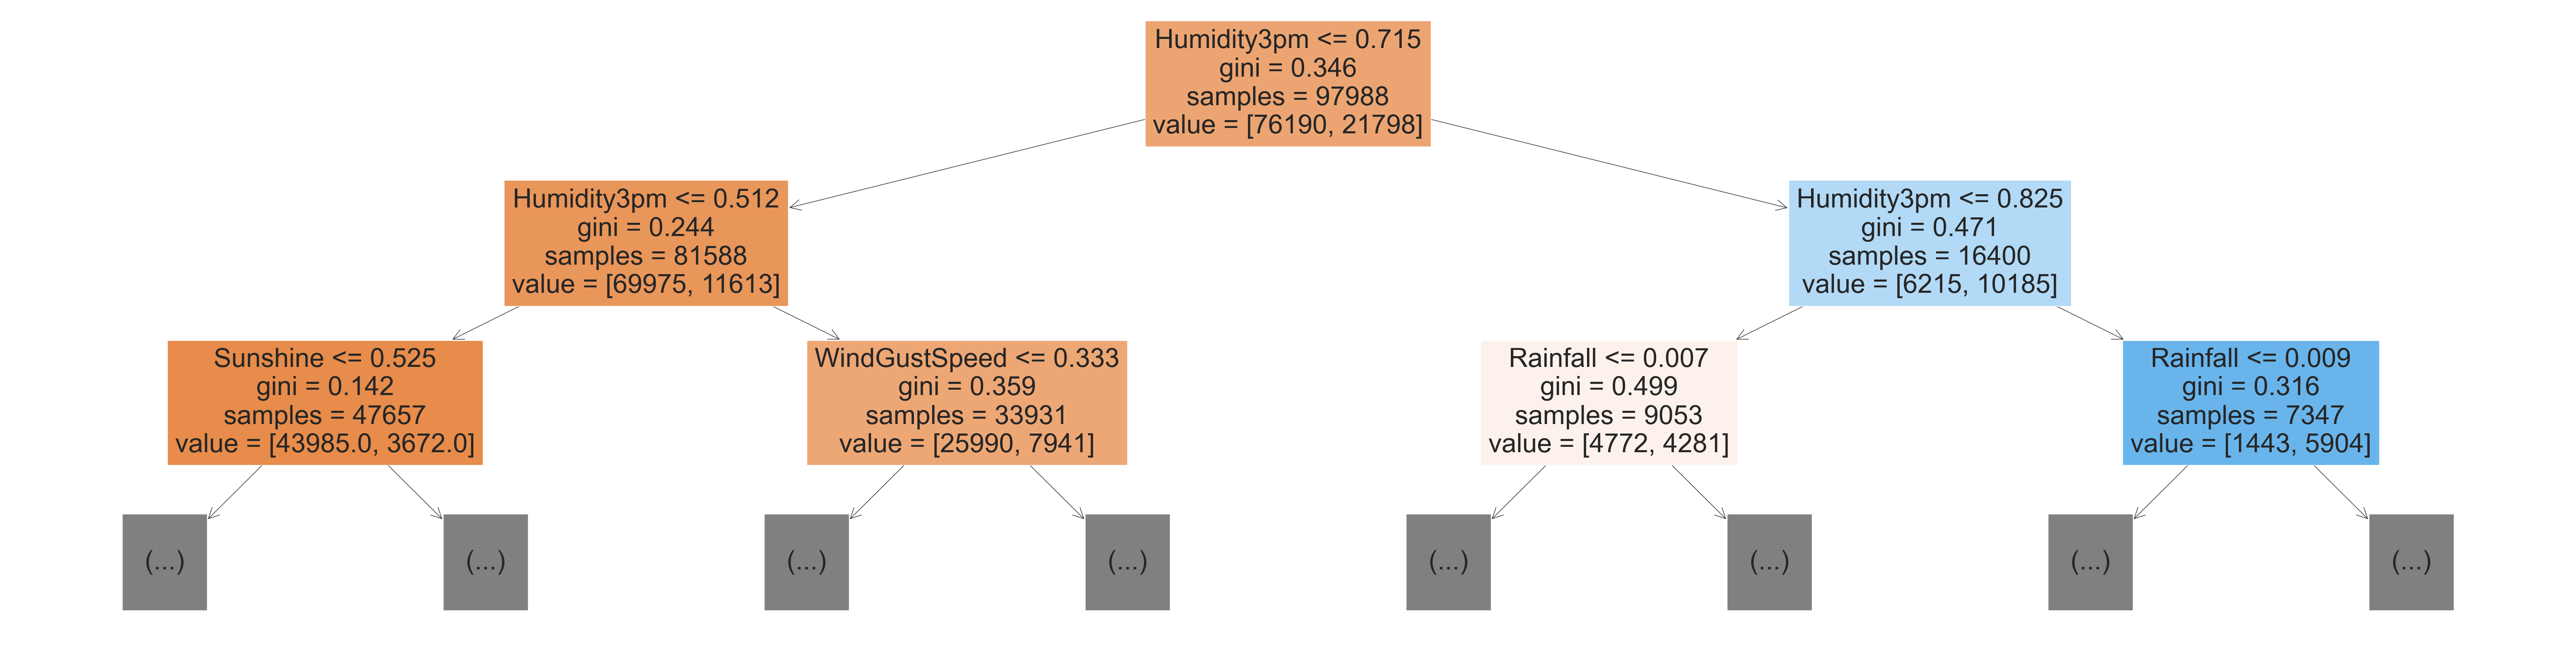

In [64]:
plt.figure(figsize = (80, 20))
plot_tree(model, feature_names = X_train.columns, max_depth = 2, filled = True)
plt.show()

In [65]:
model.tree_.max_depth

49

In [67]:
tree_text = export_text(model, feature_names = X_train.columns, max_depth = 10)

In [69]:
print(tree_text[:1000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindGustDir_N <= 0.50
|   |   |   |   |   |   |   |--- WindSpeed9am <= 0.32
|   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.06
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.06
|   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |   |   |   |   |   |--- Temp9am <= 0.65
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Temp9am >  0.65
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- WindSpeed9am >  0.32
|   |   |   |   |   |   |   | 

#### Feature Importance

In [72]:
importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model.feature_importances_
}).sort_values(by = "importance", ascending = False)

In [74]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.280039
11    Pressure3pm    0.062471
5   WindGustSpeed    0.059511
4        Sunshine    0.047766
2        Rainfall    0.042979
8     Humidity9am    0.038639
0         MinTemp    0.037861
10    Pressure9am    0.036951
14        Temp9am    0.036488
15        Temp3pm    0.031670

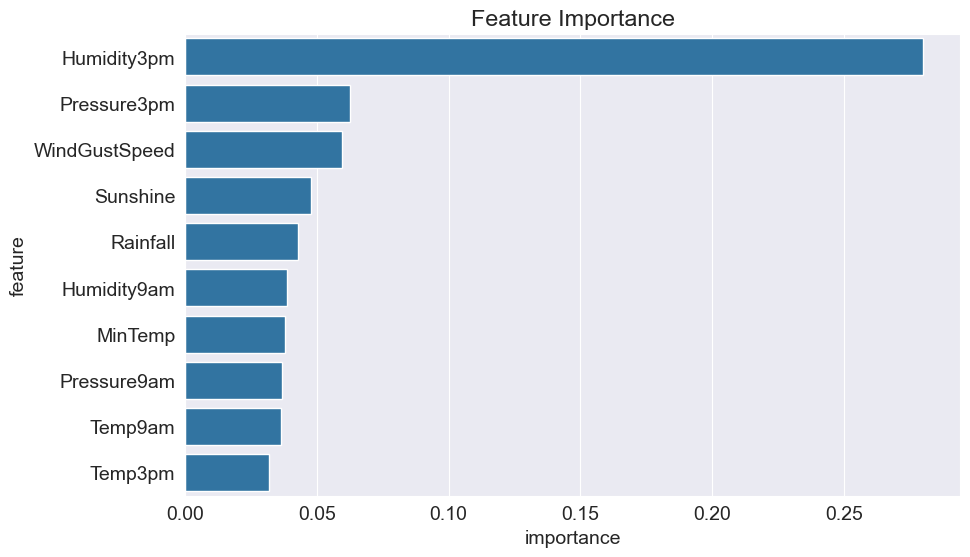

In [76]:
plt.title("Feature Importance")
sns.barplot(
    x = "importance",
    y = "feature",
    data = importance_df.head(10)
)
plt.show()